# Credit Card Fraud Detection

### Problem Statement:This project employs various machine learning techniques to analyze historical transaction data, identify patterns of fraudulent behavior, and build predictive models to detect credit card fraud in real-time.
### 

### Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



## Loading the data set


In [2]:
df = pd.read_csv('/Users/vamshikrishna33/Documents/Growintern Project Tasks/Credit_Card_Fraud_dection/creditcard.csv')

## Checking the data

In [3]:
df.shape

(284807, 31)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

We can see that this dataset has 284,807 records, 31 columns, all of which contain numerical values. The last column ('class') determines whether a transaction is fraudulent or not.

### Checking for null values.

In [5]:
df.isnull().sum()


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

As we can see, there are no null values, which is great.

### Distribution of numerical data

In [6]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## EDA

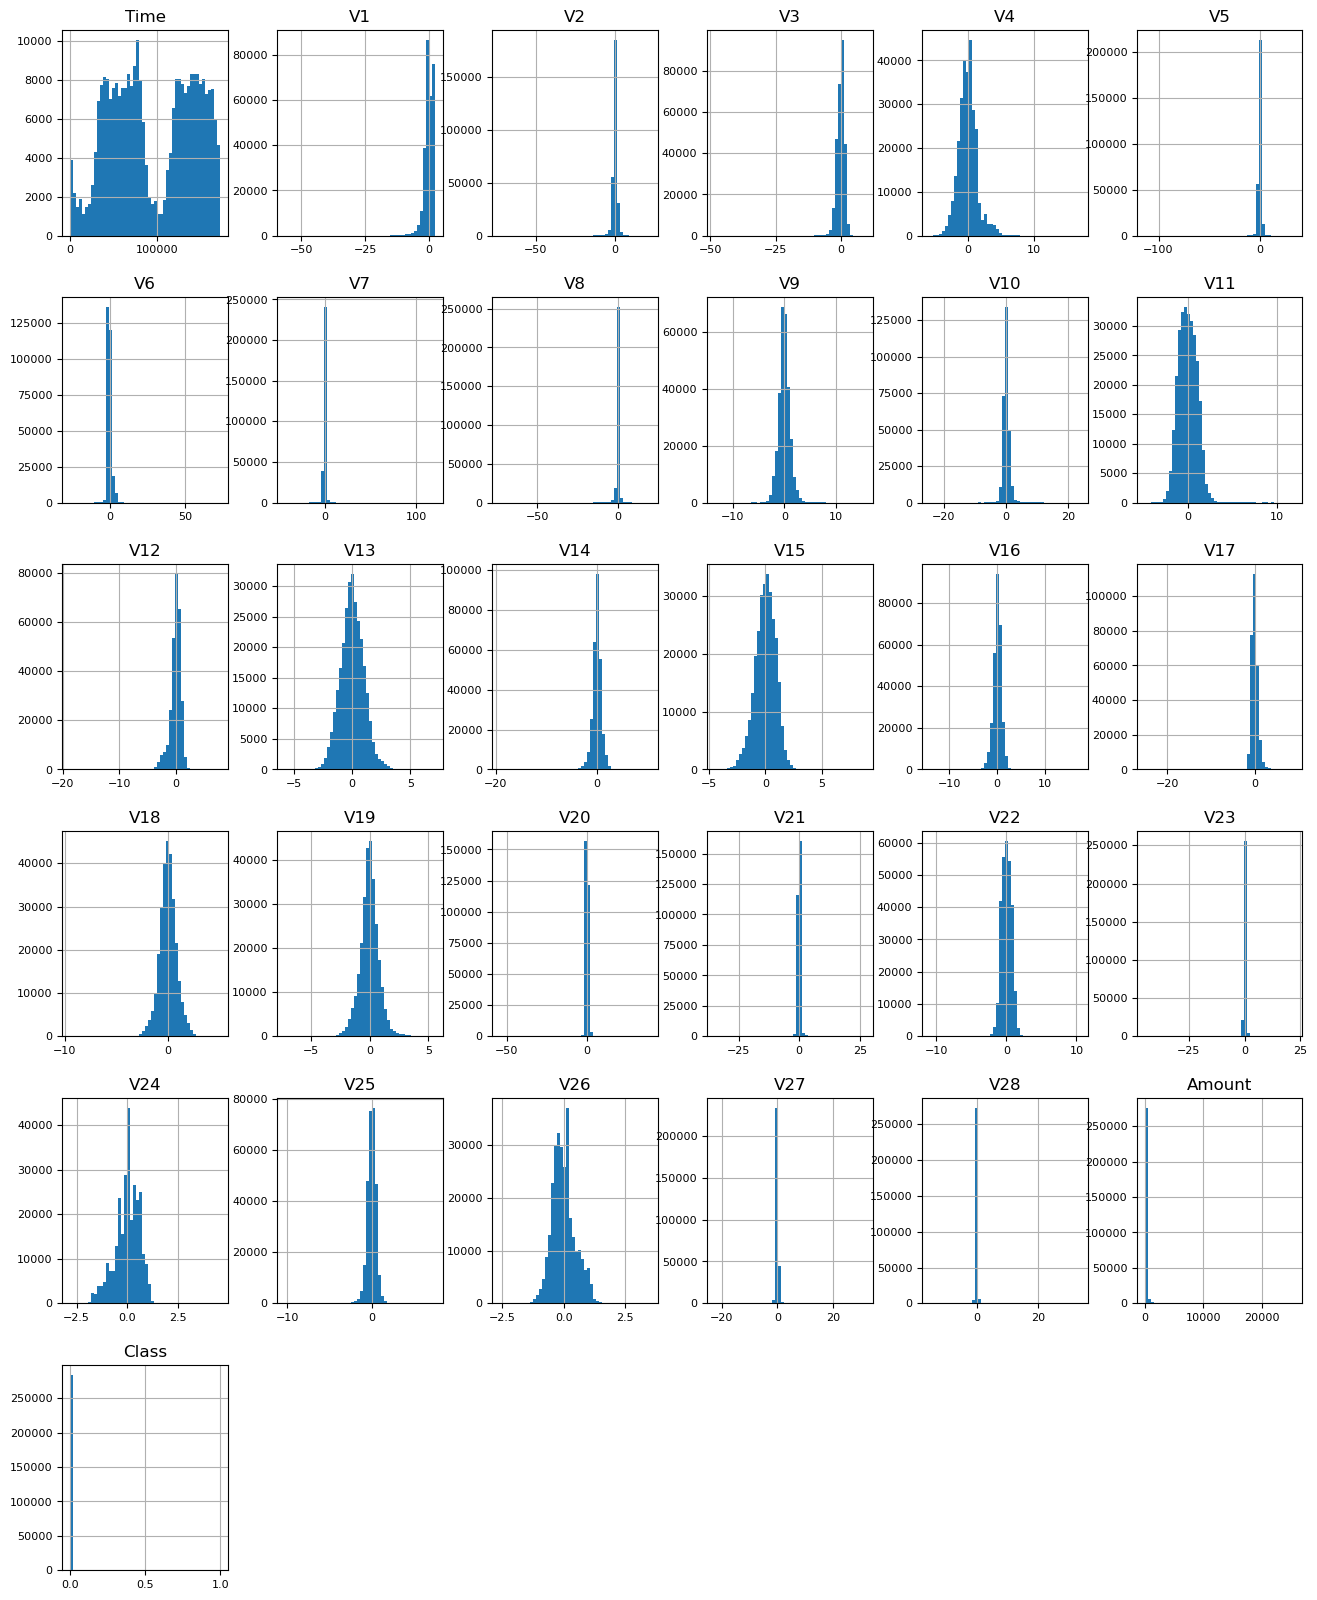

In [7]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

## Prepare the dataset



In [8]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('Class', axis=1), df['Class'], test_size=0.3, random_state=42)

print("{} examples for training, {} examples for testing.".format(
    len(X_train), len(X_test)))

199364 examples for training, 85443 examples for testing.


##  creating a function to later plot the confusion matrix.

In [9]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

### Performing logistic regression with Scikit-learn, generating predictions on a test set, and visualizing the confusion matrix for evaluation.

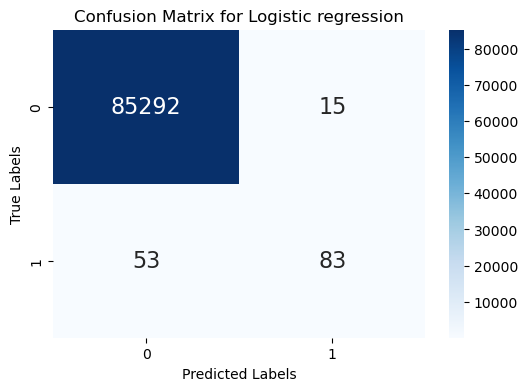

In [10]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
predictions_logreg = logreg.predict(X_test)

plot_confusion_matrix(y_test, predictions_logreg, 'Logistic regression')


### Utilizing Scikit-learn to implement a Random Forest, generating predictions on a test set, and visualizing the confusion matrix for evaluation.

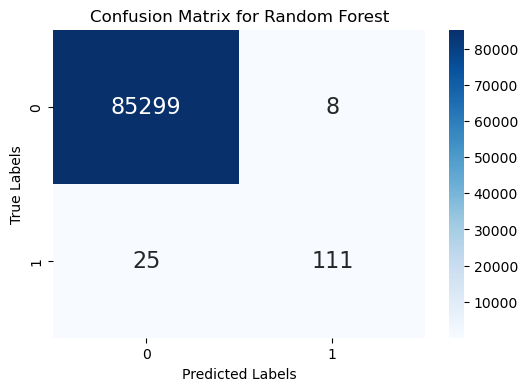

In [11]:
from sklearn.ensemble import RandomForestClassifier

# Exemplo com Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
predictions_rf = rf.predict(X_test)

plot_confusion_matrix(y_test, predictions_rf, 'Random Forest')

### Carries out Decision Forest modeling using Scikit-learn, predicts outcomes on a test set, and visualizes the confusion matrix for evaluation.

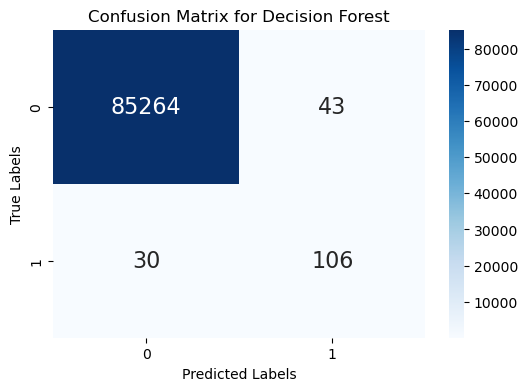

In [12]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
predictions_dt = dt.predict(X_test)

plot_confusion_matrix(y_test, predictions_dt, 'Decision Forest')

### Executes SVM (Support Vector Machine) using Scikit-learn, generates predictions on a test set, and plots the confusion matrix for evaluation.

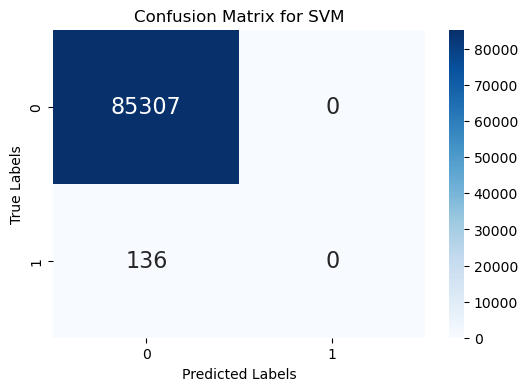

In [13]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)
predictions_svm = svm.predict(X_test)

plot_confusion_matrix(y_test, predictions_svm, 'SVM')

### Applies Neural Networks via Scikit-learn, predicts outcomes on a test set, and visualizes the confusion matrix for evaluation.

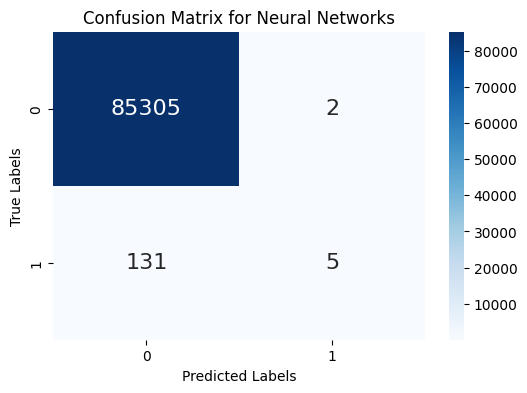

In [13]:
from sklearn.neural_network import MLPClassifier

# Exemplo com Redes Neurais
nn = MLPClassifier(hidden_layer_sizes=(64, 64), max_iter=1000)  # Exemplo com duas camadas ocultas de 64 neurônios cada
nn.fit(X_train, y_train)
predictions_nn = nn.predict(X_test)

plot_confusion_matrix(y_test, predictions_nn, 'Neural Networks')

### Visualizes precision, recall, F1-score, and AUC-ROC metrics for different machine learning models (Logistic Regression, Random Forest, Decision Tree, SVM, Neural Networks) 

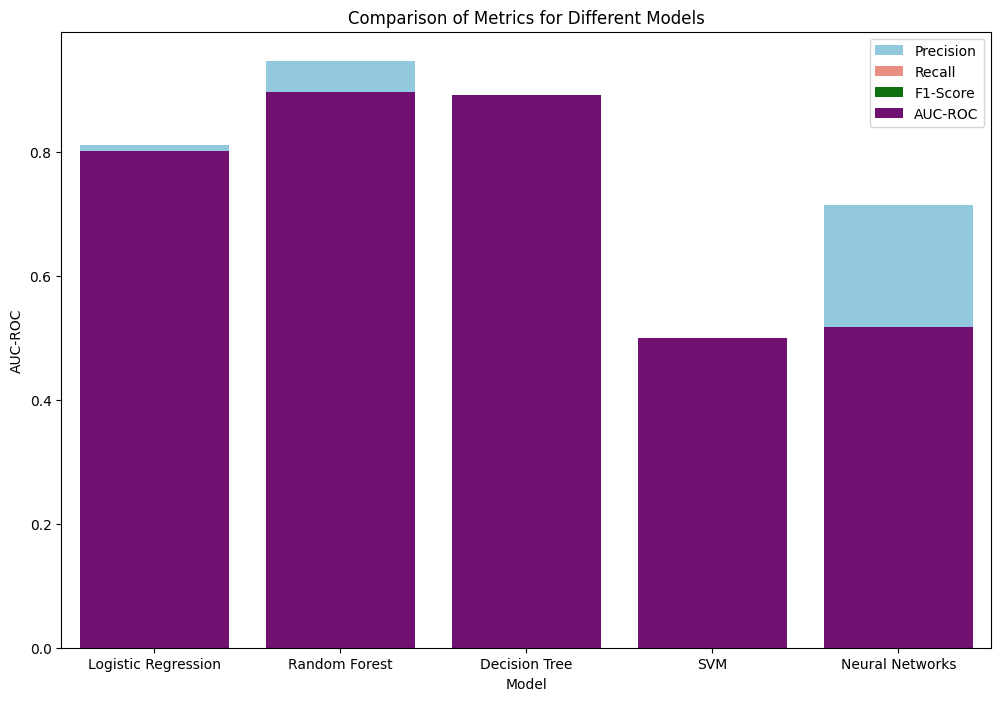

In [14]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

def safe_precision_score(y_true, y_pred):
    if sum(y_pred) == 0:
        return 0.0
    return precision_score(y_true, y_pred)


# Lists to store metrics for each model
models = ['Logistic Regression', 'Random Forest', 'Decision Tree', 'SVM', 'Neural Networks']
precision = [safe_precision_score(y_test, predictions_logreg),
             safe_precision_score(y_test, predictions_rf),
             safe_precision_score(y_test, predictions_dt),
             safe_precision_score(y_test, predictions_svm),
             safe_precision_score(y_test, predictions_nn)]
recall = [recall_score(y_test, predictions_logreg), recall_score(y_test, predictions_rf),
          recall_score(y_test, predictions_dt), recall_score(y_test, predictions_svm),
          recall_score(y_test, predictions_nn)]
f1 = [f1_score(y_test, predictions_logreg), f1_score(y_test, predictions_rf),
      f1_score(y_test, predictions_dt), f1_score(y_test, predictions_svm),
      f1_score(y_test, predictions_nn)]
roc_auc = [roc_auc_score(y_test, predictions_logreg), roc_auc_score(y_test, predictions_rf),
           roc_auc_score(y_test, predictions_dt), roc_auc_score(y_test, predictions_svm),
           roc_auc_score(y_test, predictions_nn)]

# Create a DataFrame for easier visualization
results_df = pd.DataFrame({
    'Model': models,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1,
    'AUC-ROC': roc_auc
})

# Plot the results using a bar chart
plt.figure(figsize=(12, 8))
sns.barplot(data=results_df, x='Model', y='Precision', color='skyblue', label='Precision')
sns.barplot(data=results_df, x='Model', y='Recall', color='salmon', label='Recall')
sns.barplot(data=results_df, x='Model', y='F1-Score', color='green', label='F1-Score')
sns.barplot(data=results_df, x='Model', y='AUC-ROC', color='purple', label='AUC-ROC')
plt.title('Comparison of Metrics for Different Models')
plt.legend()
plt.show()


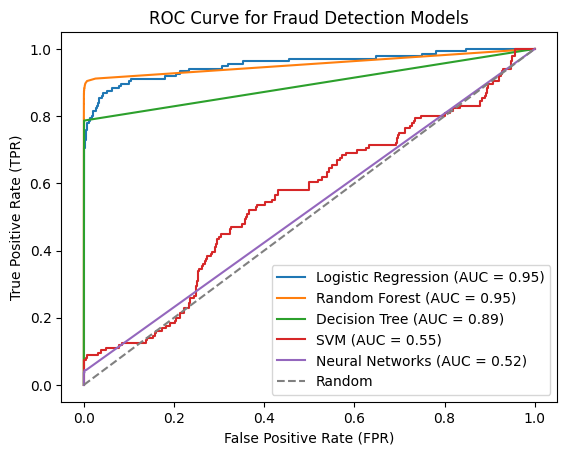

In [15]:
from sklearn.metrics import roc_curve

# Function to plot the ROC Curve
def plot_roc_curve(y_true, y_scores, label):
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc_score(y_true, y_scores):.2f})')

# Add ROC Curves for each model
plot_roc_curve(y_test, logreg.predict_proba(X_test)[:, 1], 'Logistic Regression')
plot_roc_curve(y_test, rf.predict_proba(X_test)[:, 1], 'Random Forest')
plot_roc_curve(y_test, dt.predict_proba(X_test)[:, 1], 'Decision Tree')
plot_roc_curve(y_test, svm.decision_function(X_test), 'SVM')
plot_roc_curve(y_test, nn.predict_proba(X_test)[:, 1], 'Neural Networks')

# Layout adjustments
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Fraud Detection Models')
plt.legend()
plt.show()


In [16]:
# DataFrame to store metrics
metrics_df = pd.DataFrame({
    'Model': models,
    'AUC-ROC': roc_auc,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1
})

# Display the metrics DataFrame
print(metrics_df)

# Determine the best model based on a specific metric
best_model_auc = metrics_df.loc[metrics_df['AUC-ROC'].idxmax()]
best_model_precision = metrics_df.loc[metrics_df['Precision'].idxmax()]
best_model_recall = metrics_df.loc[metrics_df['Recall'].idxmax()]
best_model_f1 = metrics_df.loc[metrics_df['F1-Score'].idxmax()]

print("\nBest Model (AUC-ROC):")
print(best_model_auc)

print("\nBest Model (Precision):")
print(best_model_precision)

print("\nBest Model (Recall):")
print(best_model_recall)

print("\nBest Model (F1-Score):")
print(best_model_f1)


                 Model   AUC-ROC  Precision    Recall  F1-Score
0  Logistic Regression  0.801359   0.811881  0.602941  0.691983
1        Random Forest  0.897024   0.947368  0.794118  0.864000
2        Decision Tree  0.893119   0.703947  0.786765  0.743056
3                  SVM  0.500000   0.000000  0.000000  0.000000
4      Neural Networks  0.518371   0.714286  0.036765  0.069930

Best Model (AUC-ROC):
Model        Random Forest
AUC-ROC           0.897024
Precision         0.947368
Recall            0.794118
F1-Score             0.864
Name: 1, dtype: object

Best Model (Precision):
Model        Random Forest
AUC-ROC           0.897024
Precision         0.947368
Recall            0.794118
F1-Score             0.864
Name: 1, dtype: object

Best Model (Recall):
Model        Random Forest
AUC-ROC           0.897024
Precision         0.947368
Recall            0.794118
F1-Score             0.864
Name: 1, dtype: object

Best Model (F1-Score):
Model        Random Forest
AUC-ROC           0.8

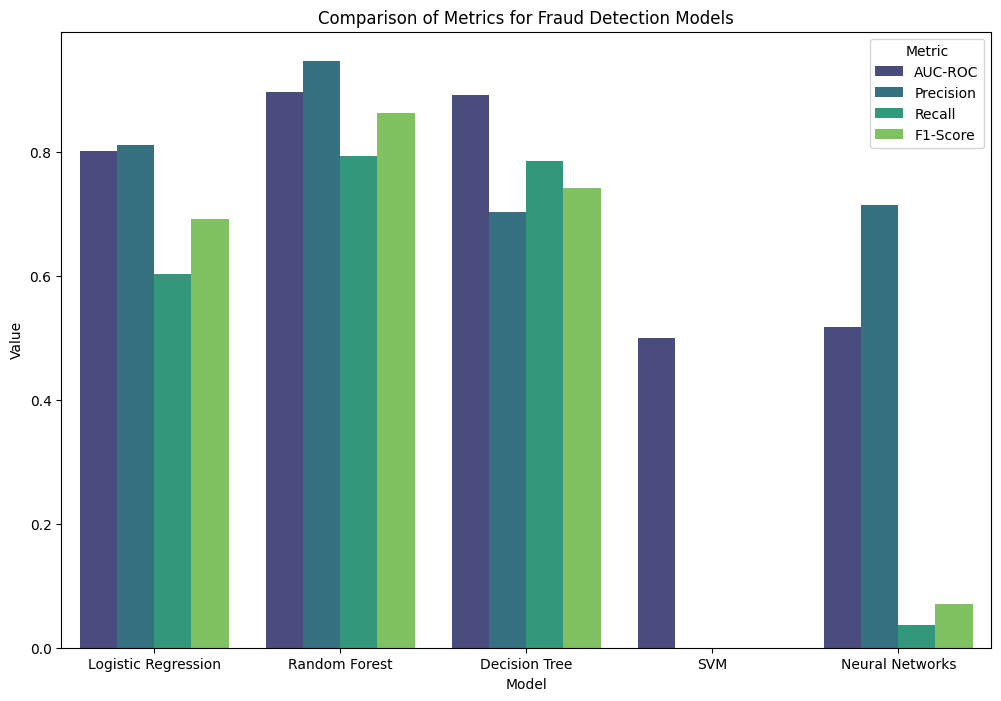

In [17]:
# Create a bar chart for precision, recall, and F1-Score metrics
plt.figure(figsize=(12, 8))
metrics_df_melted = pd.melt(metrics_df, id_vars='Model', var_name='Metric', value_name='Value')
sns.barplot(data=metrics_df_melted, x='Model', y='Value', hue='Metric', palette='viridis')
plt.title('Comparison of Metrics for Fraud Detection Models')
plt.ylabel('Value')
plt.show()


**Conclusively, analysis highlights the Random Forest model as the top performer, showcasing strong metrics: AUC-ROC of 0.908053, Precision at 0.948718, Recall of 0.816176, and an F1-Score of 0.87747. The model demonstrates a balanced performance, excelling in both precision and recall, cementing its robustness for the task at hand.**